# Mushroom

http://archive.ics.uci.edu/dataset/73/mushroom

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels import robust
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.impute import KNNImputer
from scipy.stats import gaussian_kde
import seaborn as sns

In [2]:
# fetch dataset
m_shroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
x = m_shroom.data.features
y = m_shroom.data.targets

mushroom = pd.concat([x, y], axis=1)

# metadata
print(m_shroom.metadata)

# variable information
print(m_shroom.variables)

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [3]:
mushroom.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [5]:
# ENCODING
# Label-Encoding of all values
label_encoders = {}
for column in mushroom.columns:
    encoder = LabelEncoder()
    mushroom[column] = encoder.fit_transform(mushroom[column])

In [6]:
mushroom.head ()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


In [7]:
# Normalizing all values
scaler = MinMaxScaler()

mushroom_scaled = scaler.fit_transform(mushroom)

# Convert the numpy arrays to DataFrames
mushroom_scaled = pd.DataFrame(mushroom_scaled, columns=mushroom.columns)

mushroom = mushroom_scaled

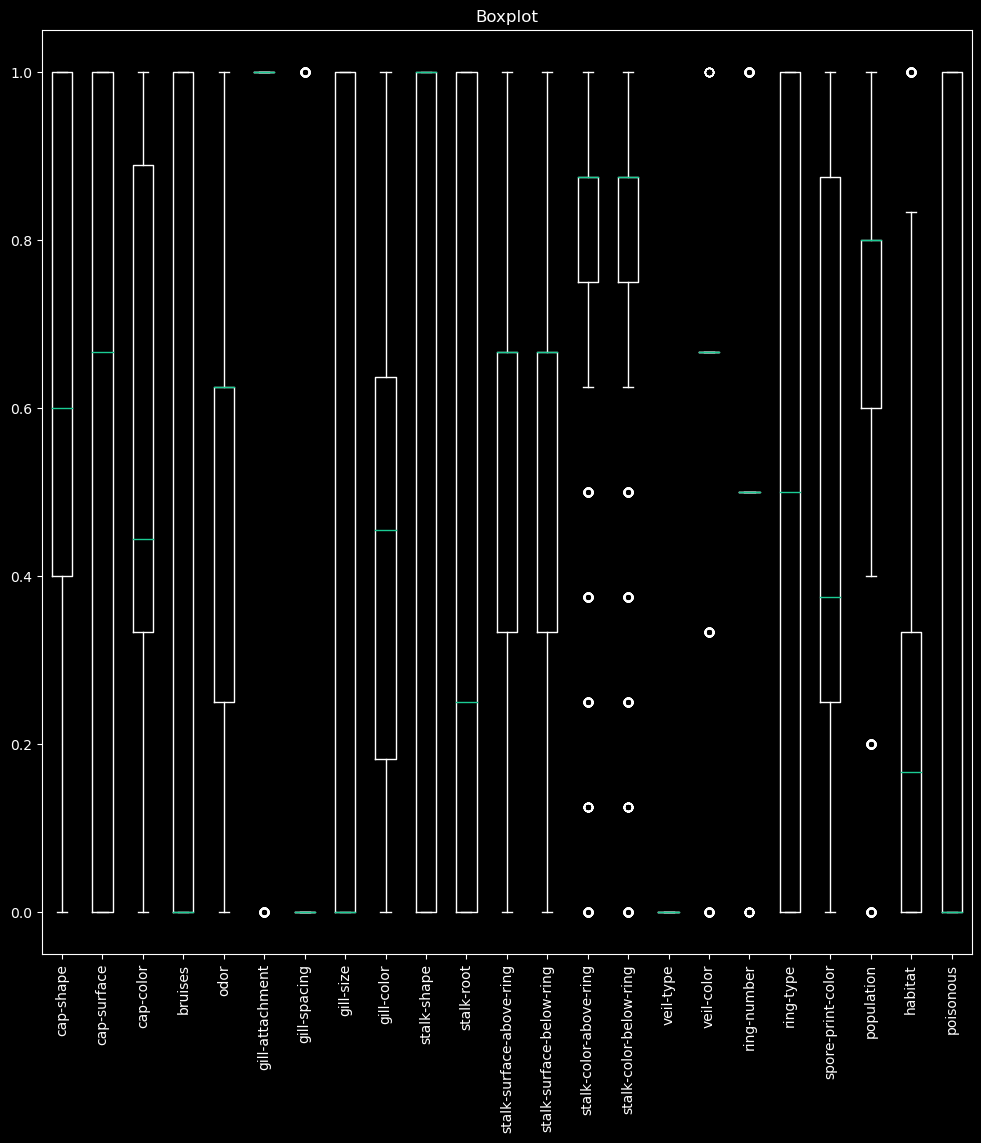

In [8]:
# Boxplots
plt.figure(figsize=(12,12))
plt.title("Boxplot")
plt.boxplot(mushroom,labels=mushroom.columns,medianprops=dict(color="#1ACC94"))
plt.xticks(rotation=90)
plt.show()

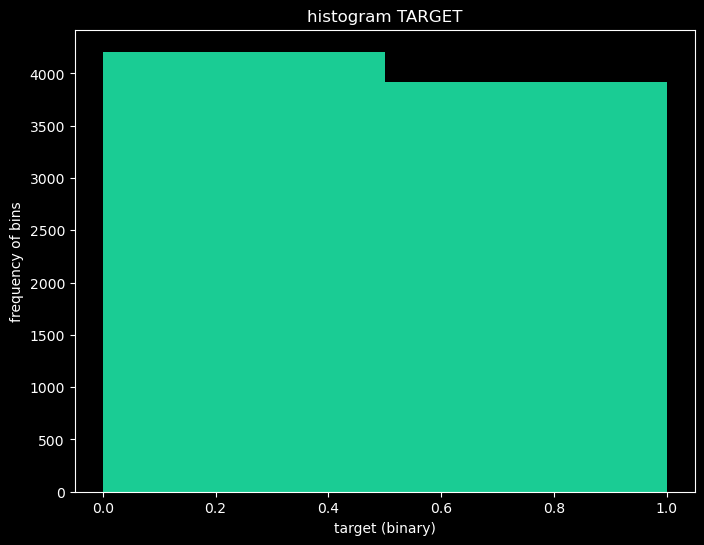

In [9]:
# Historgram
plt.figure(figsize=(8,6))
plt.title("histogram TARGET")
plt.hist(mushroom["poisonous"],bins=2,color="#1ACC94")
plt.ylabel("frequency of bins")
plt.xlabel("target (binary)")
plt.show()

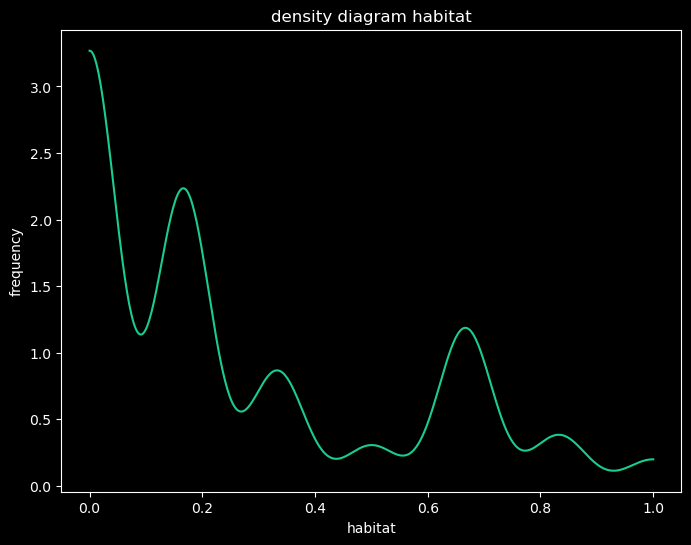

In [10]:
# density diagram "habitat"
density_habitat = gaussian_kde(mushroom["habitat"])
x_habitat = np.linspace(mushroom["habitat"].min(),mushroom["habitat"].max(),500)

plt.figure(figsize=(8,6))
plt.title("density diagram habitat")
plt.plot(x_habitat, density_habitat(x_habitat),color="#1ACC94")
plt.ylabel("frequency")
plt.xlabel("habitat")
plt.show()

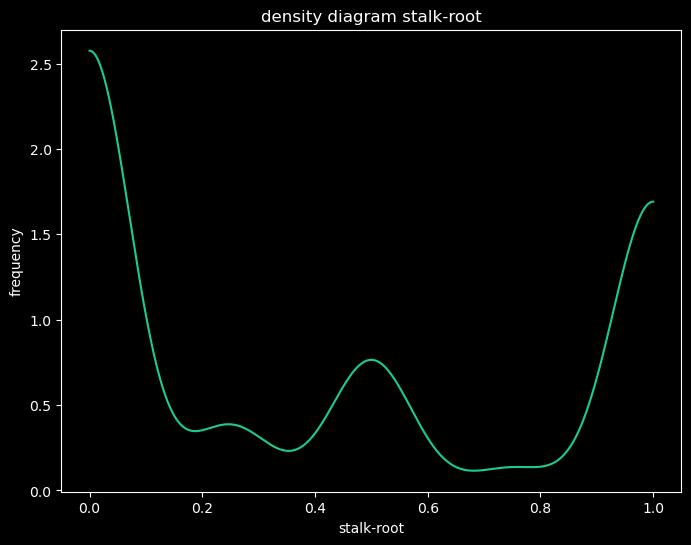

In [11]:
# density diagram "stalk-root"
density_stalk = gaussian_kde(mushroom["stalk-root"])
x_stalk = np.linspace(mushroom["stalk-root"].min(),mushroom["stalk-root"].max(),500)

plt.figure(figsize=(8,6))
plt.title("density diagram stalk-root")
plt.plot(x_stalk, density_stalk(x_stalk),color="#1ACC94")
plt.ylabel("frequency")
plt.xlabel("stalk-root")
plt.show()

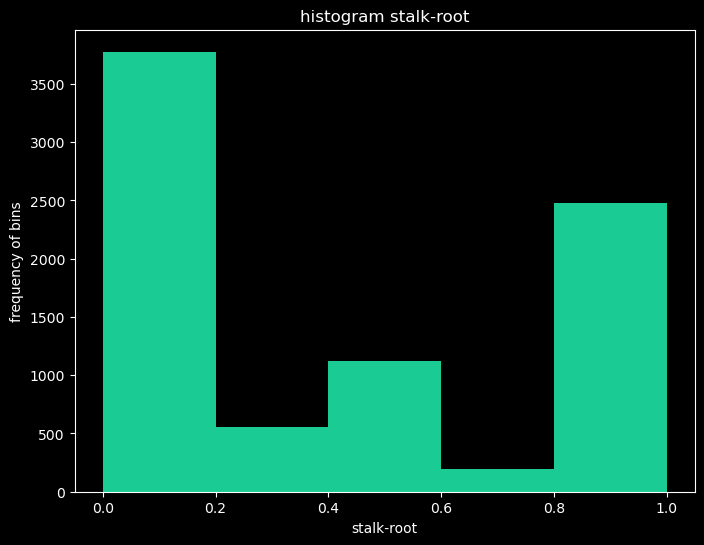

In [12]:
# Historgram stalk-root
plt.figure(figsize=(8,6))
plt.title("histogram stalk-root")
plt.hist(mushroom["stalk-root"],bins=5,color="#1ACC94")
plt.ylabel("frequency of bins")
plt.xlabel("stalk-root")
plt.show()

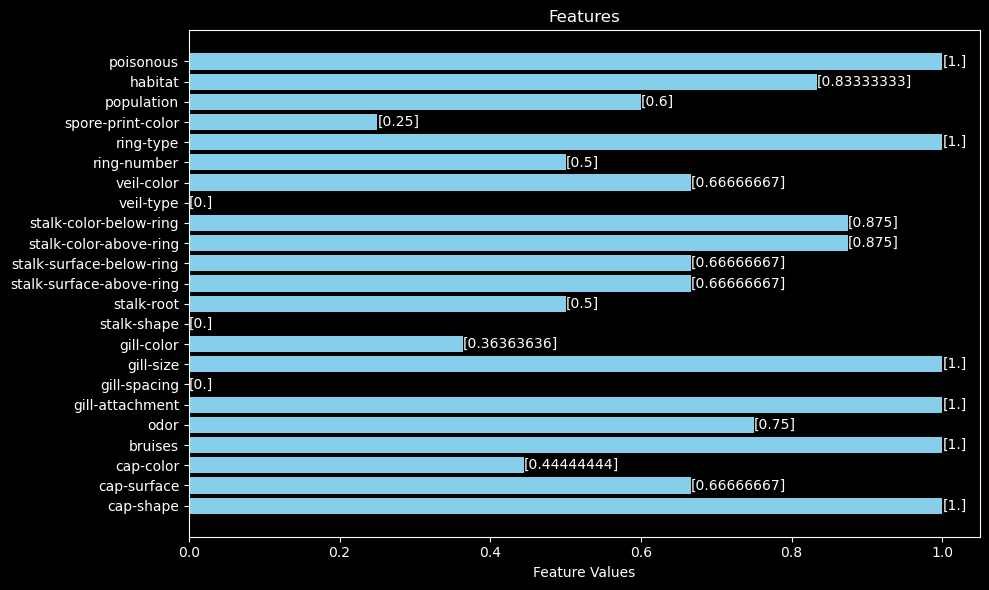

In [13]:
features = mushroom.columns
feature_values = mushroom.values.reshape(-1, 1)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for each feature
for i, feature in enumerate(features):
    ax.barh(i, feature_values[i], color='skyblue')
    ax.text(feature_values[i], i, str(feature_values[i]), ha='left', va='center')

# Setting y-axis ticks and labels
ax.set_yticks(range(len(features)))
ax.set_yticklabels(features)

# Setting labels and title
ax.set_xlabel("Feature Values")
ax.set_title('Features')

# Show plot
plt.tight_layout()
plt.show()

/Users/Pudzich/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/Pudzich/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/Pudzich/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='cap-shape', ylabel='cap-shape'>,
        <Axes: xlabel='cap-surface', ylabel='cap-shape'>,
        <Axes: xlabel='cap-color', ylabel='cap-shape'>,
        <Axes: xlabel='bruises', ylabel='cap-shape'>,
        <Axes: xlabel='odor', ylabel='cap-shape'>,
        <Axes: xlabel='gill-attachment', ylabel='cap-shape'>,
        <Axes: xlabel='gill-spacing', ylabel='cap-shape'>,
        <Axes: xlabel='gill-size', ylabel='cap-shape'>,
        <Axes: xlabel='gill-color', ylabel='cap-shape'>,
        <Axes: xlabel='stalk-shape', ylabel='cap-shape'>,
        <Axes: xlabel='stalk-root', ylabel='cap-shape'>,
        <Axes: xlabel='stalk-surface-above-ring', ylabel='cap-shape'>,
        <Axes: xlabel='stalk-surface-below-ring', ylabel='cap-shape'>,
        <Axes: xlabel='stalk-color-above-ring', ylabel='cap-shape'>,
        <Axes: xlabel='stalk-color-below-ring', ylabel='cap-shape'>,
        <Axes: xlabel='veil-type', ylabel='cap-shape'>,
        <Axes: xlabel='veil-color', ylab

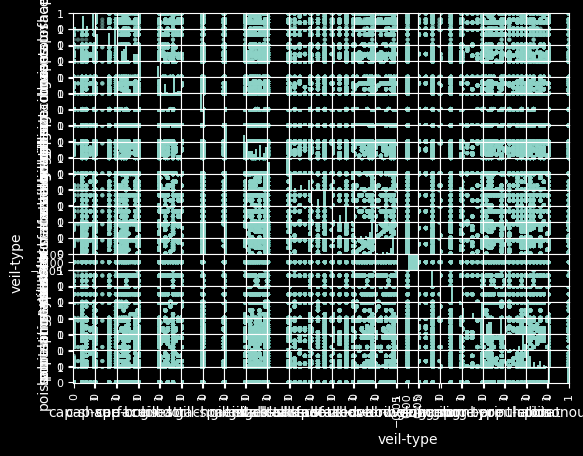

In [14]:
# Scatterplot

pd.plotting.scatter_matrix(mushroom)

In [15]:
# correlations
corr_matrix_first = mushroom.corr()
corr_matrix_first

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.052951
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.178446
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.031384
bruises,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.501530
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.093552
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.129200
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,-0.348387
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.540024
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.530566
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,0.223439,0.235794,NaN,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216,-0.102019


In [16]:
# Filter out correlations where both features are the same (correlation equals 1)
mask = np.eye(len(corr_matrix_first), dtype=bool)
filtered_corr = corr_matrix_first.mask(mask)

# Find correlations greater than or equal to 0.5
high_corr = filtered_corr[filtered_corr >= 0.5].stack().reset_index()

# Find correlations smaller than or equal to -0.5
high_corr_low = filtered_corr[filtered_corr <= -0.5].stack().reset_index()

high_corr.head (20)

,level_0,level_1,0
0,bruises,gill-color,0.527120
1,bruises,ring-type,0.692973
2,gill-attachment,veil-color,0.897518
3,gill-size,stalk-root,0.585670
4,gill-size,spore-print-color,0.622991
5,gill-size,poisonous,0.540024
6,gill-color,bruises,0.527120
7,gill-color,ring-type,0.629398
8,stalk-root,gill-size,0.585670
9,stalk-root,spore-print-color,0.788569


In [17]:
high_corr_low.head (20)

,level_0,level_1,0
0,bruises,poisonous,-0.501530
1,gill-spacing,population,-0.529253
2,gill-size,gill-color,-0.516736
3,gill-color,gill-size,-0.516736
4,gill-color,stalk-root,-0.503697
5,gill-color,poisonous,-0.530566
6,stalk-root,gill-color,-0.503697
7,stalk-root,ring-type,-0.600234
8,ring-type,stalk-root,-0.600234
9,population,gill-spacing,-0.529253


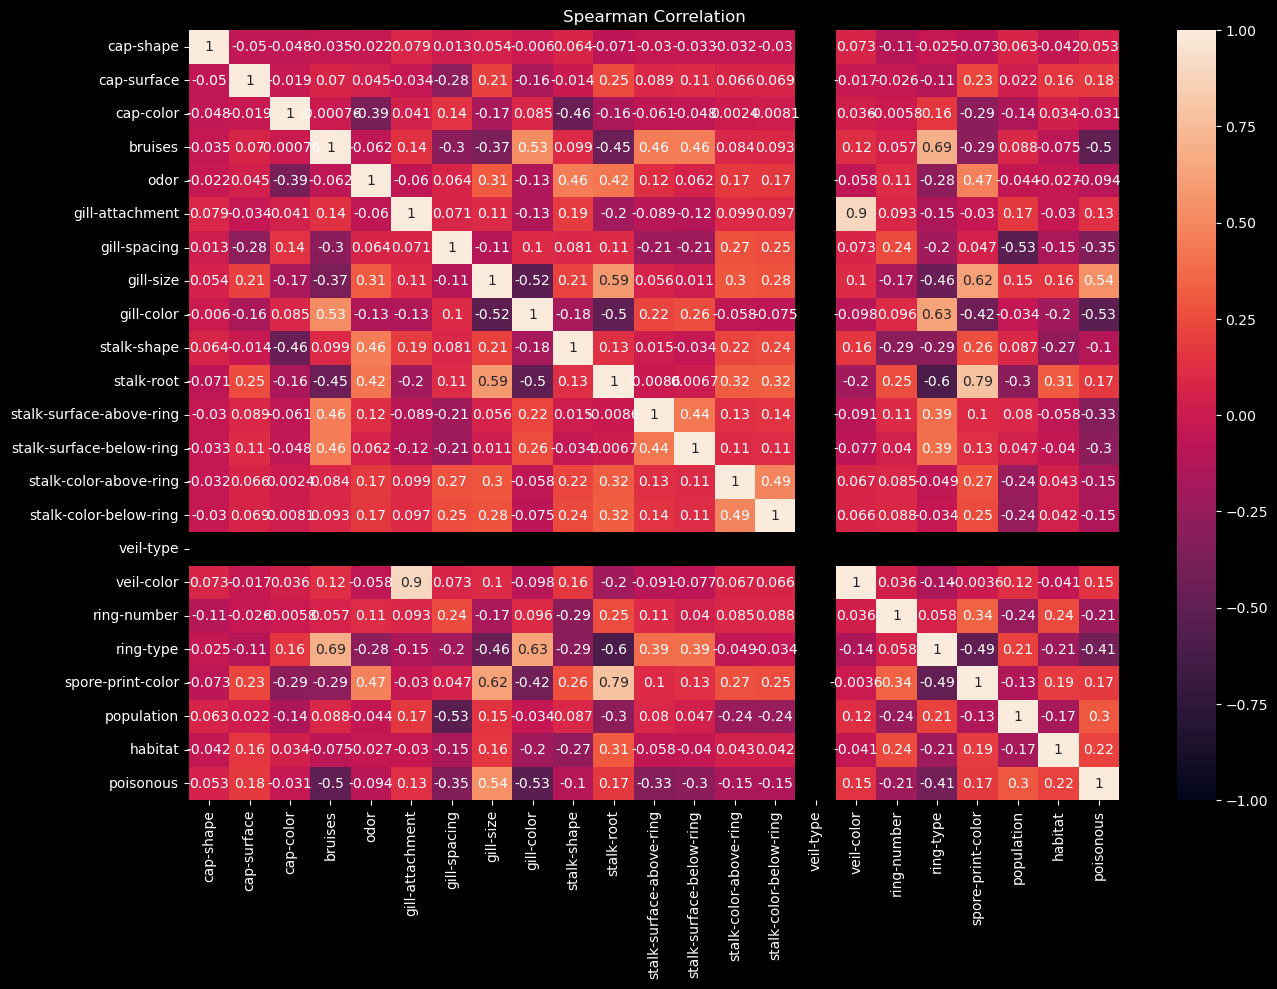

In [18]:
# Visualization of correlations with Spearman

def display_correlation(mushroom):
    r = mushroom.corr(method="spearman")
    plt.figure(figsize=(15,10))
    heatmap = sns.heatmap(mushroom.corr(), vmin=-1, vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

r_simple = display_correlation(mushroom)

In [19]:
unique_values = mushroom["veil-type"].value_counts()
print(unique_values)

veil-type
0.0    8124
Name: count, dtype: int64


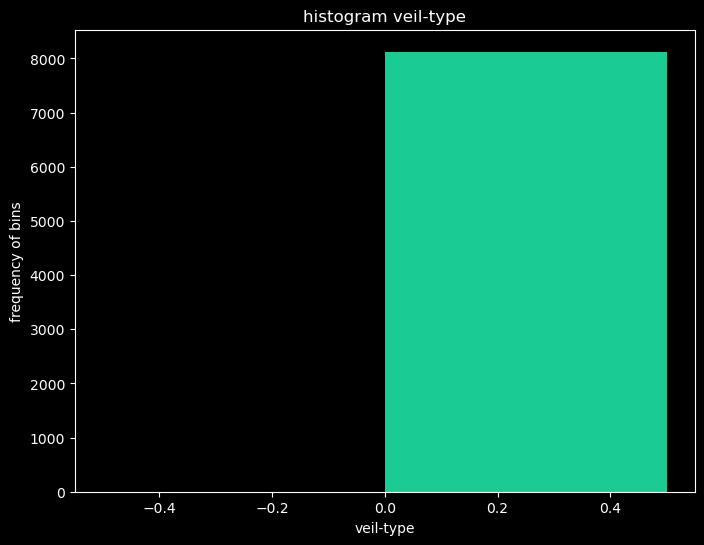

In [20]:
# Historgram "veil-type"
plt.figure(figsize=(8,6))
plt.title("histogram veil-type")
plt.hist(mushroom["veil-type"],bins=2,color="#1ACC94")
plt.ylabel("frequency of bins")
plt.xlabel("veil-type")
plt.show()

In [21]:
# Adopting values: dropping "veil-type" since it only contains one characteristic
to_drop = ["veil-type"]
mushroom.drop(to_drop, axis=1, inplace=True)

In [22]:
# calculating new correlations
corr_matrix_second = mushroom.corr()
corr_matrix_second

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.052951
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.178446
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.031384
bruises,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.501530
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.093552
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.129200
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,-0.348387
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.540024
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.530566
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,-0.034399,0.223439,0.235794,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216,-0.102019


In [23]:
# Filter out correlations where both features are the same (correlation equals 1)
mask = np.eye(len(corr_matrix_second), dtype=bool)
filtered_corr2 = corr_matrix_second.mask(mask)

# Find correlations greater than or equal to 0.5
high_corr2 = filtered_corr2[filtered_corr2 >= 0.5].stack().reset_index()

# Find correlations smaller than or equal to -0.5
high_corr3 = filtered_corr2[filtered_corr2 <= -0.5].stack().reset_index()

high_corr2.head (20)

,level_0,level_1,0
0,bruises,gill-color,0.527120
1,bruises,ring-type,0.692973
2,gill-attachment,veil-color,0.897518
3,gill-size,stalk-root,0.585670
4,gill-size,spore-print-color,0.622991
5,gill-size,poisonous,0.540024
6,gill-color,bruises,0.527120
7,gill-color,ring-type,0.629398
8,stalk-root,gill-size,0.585670
9,stalk-root,spore-print-color,0.788569


In [24]:
high_corr3.head (20)

,level_0,level_1,0
0,bruises,poisonous,-0.501530
1,gill-spacing,population,-0.529253
2,gill-size,gill-color,-0.516736
3,gill-color,gill-size,-0.516736
4,gill-color,stalk-root,-0.503697
5,gill-color,poisonous,-0.530566
6,stalk-root,gill-color,-0.503697
7,stalk-root,ring-type,-0.600234
8,ring-type,stalk-root,-0.600234
9,population,gill-spacing,-0.529253


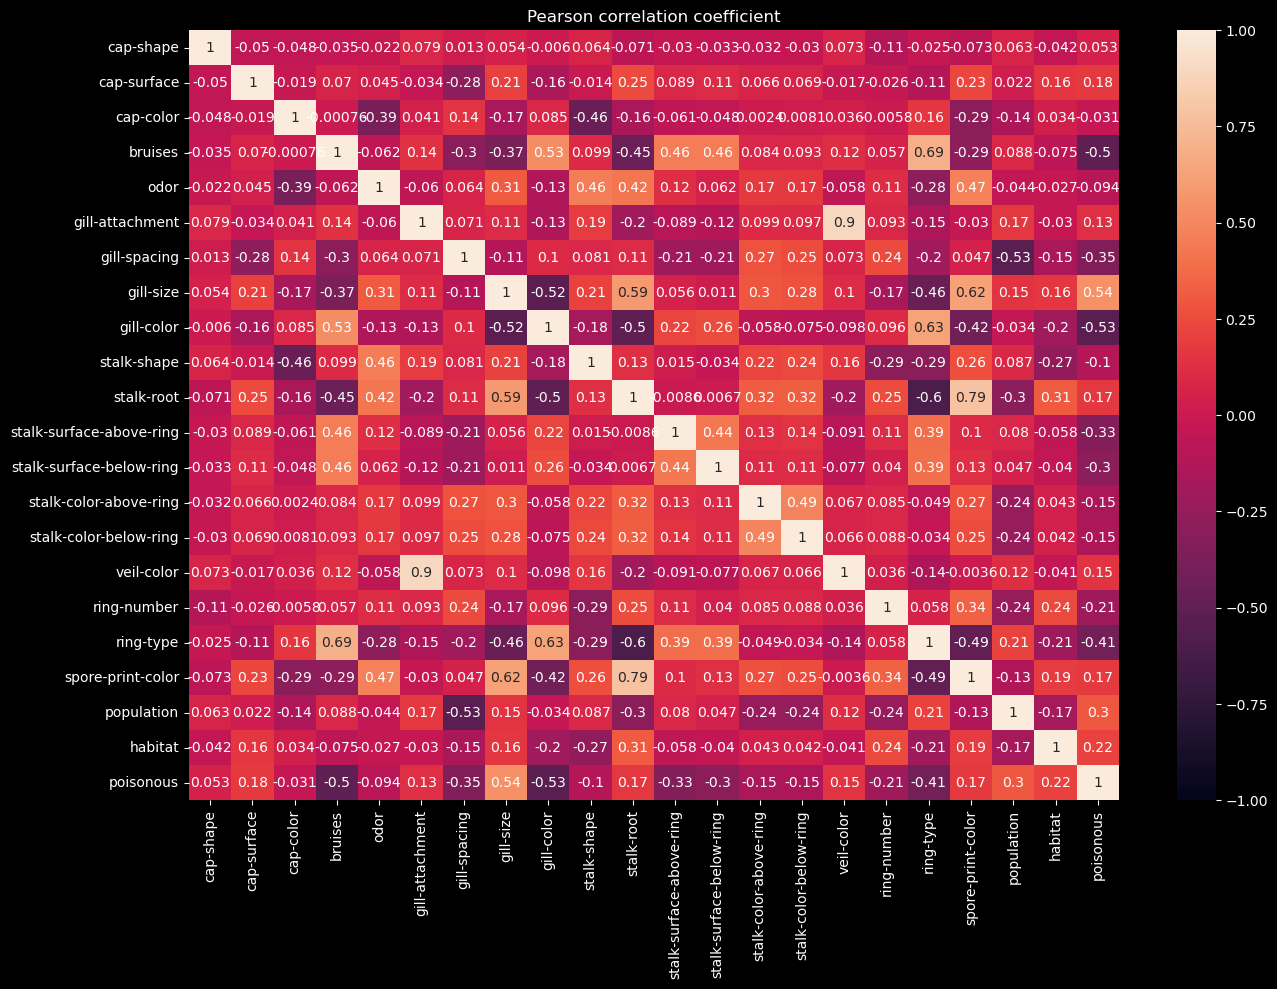

In [25]:
# Visualization of second Pearson-Matrix

def display_correlation(mushroom):
    r = mushroom.corr(method="pearson")
    plt.figure(figsize=(15,10))
    heatmap = sns.heatmap(mushroom.corr(), vmin=-1, vmax=1, annot=True)
    plt.title("Pearson correlation coefficient")
    return(r)

r_simple = display_correlation(mushroom)

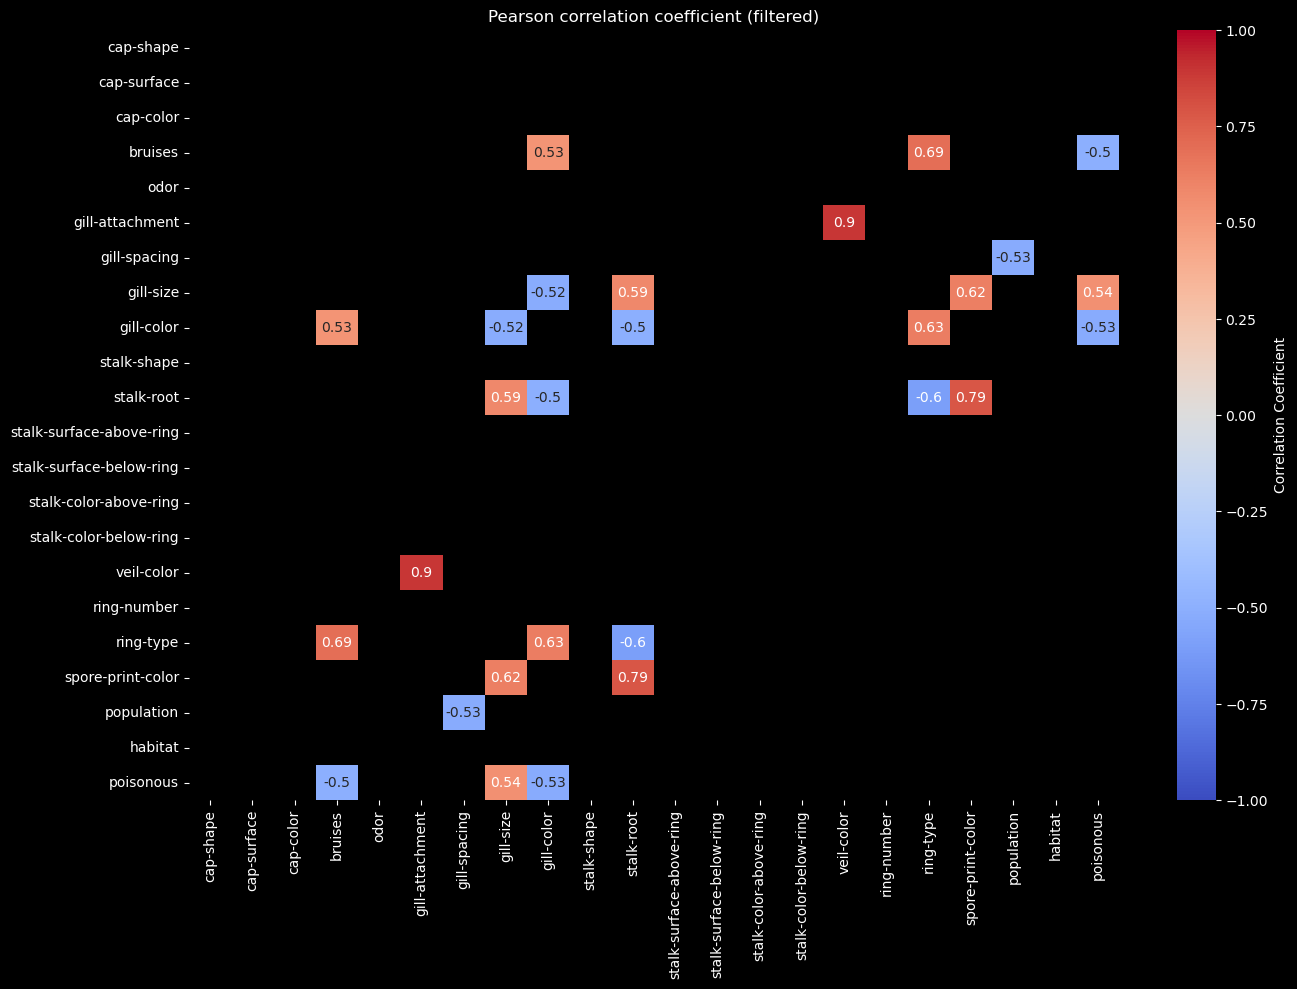

In [26]:
# Visualization of second Pearson-Matrix

def display_correlation(mushroom):
    r = mushroom.corr(method="pearson")
    mask = ((r > 0.5) | (r < -0.5)) & (r != 1)
    filtered_r = r.where(mask)
    plt.figure(figsize=(15,10))
    heatmap = sns.heatmap(filtered_r, vmin=-1, vmax=1, annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})
    plt.title("Pearson correlation coefficient (filtered)")
    return(r)

r_simple = display_correlation(mushroom)

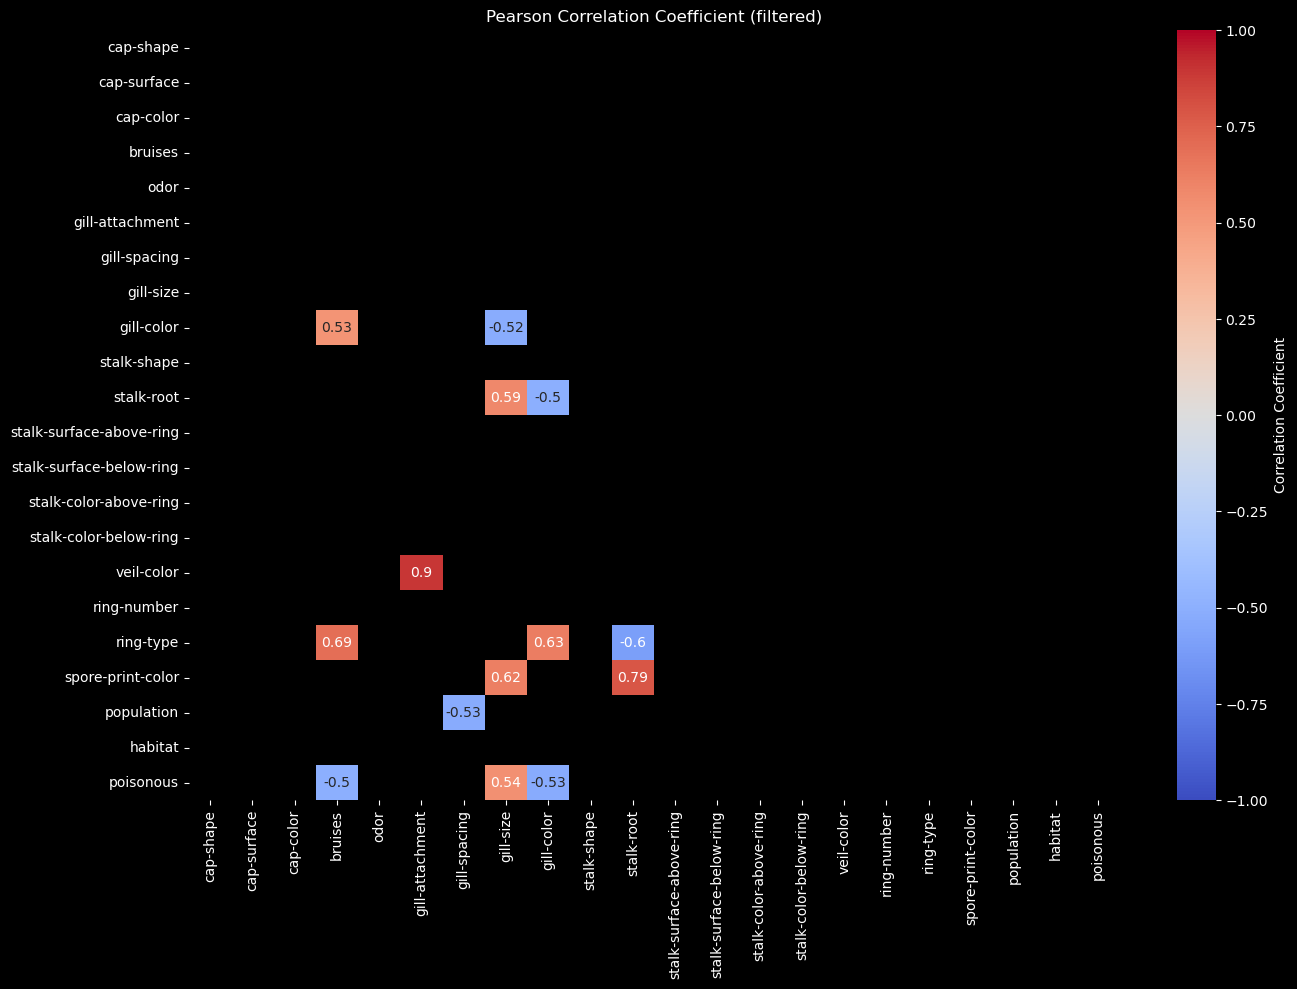

In [27]:
def display_correlation(mushroom):
    r = mushroom.corr(method="pearson")
    mask_threshold = ((r > 0.5) | (r < -0.5)) & (r != 1)
    filtered_r = r.where(mask_threshold)
    mask = np.triu(np.ones_like(filtered_r, dtype=bool))
    combined_mask = mask | ~mask_threshold
    plt.figure(figsize=(15, 10))
    heatmap = sns.heatmap(filtered_r, vmin=-1, vmax=1, annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'}, mask=combined_mask)
    plt.title("Pearson Correlation Coefficient (filtered)")
    plt.show()
    return filtered_r

r_simple = display_correlation(mushroom)
